In [88]:
df=read.csv('C:\\Users\\abine\\OneDrive\\Documents\\Datasets\\bank1\\bank.csv')

In [89]:
head(df)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


In [ ]:
install.packages('Amelia')

Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abine\AppData\Local\Temp\RtmpqQqiiK\downloaded_packages


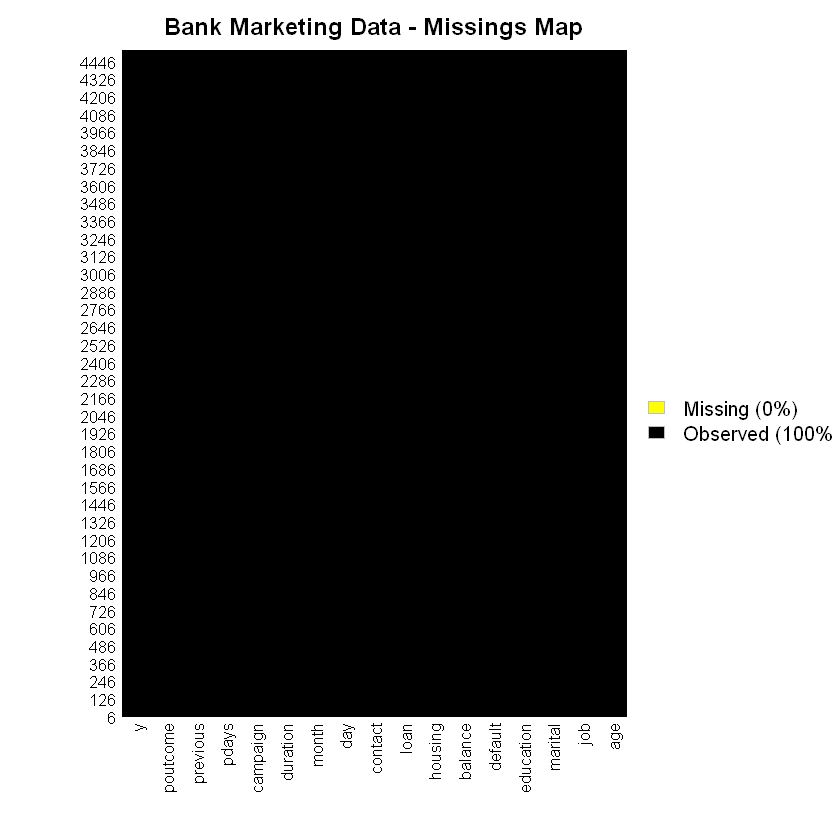

In [90]:
library('Amelia')
missmap(df,main="Bank Marketing Data - Missings Map",col=c("yellow","black"),legend=TRUE)

There is no missing values in this dataset

In [91]:
str(df)

'data.frame':	4521 obs. of  17 variables:
 $ age      : int  30 33 35 30 59 35 36 39 41 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 11 8 5 5 2 5 7 10 3 8 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 2 3 2 2 3 2 2 2 2 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 1 2 3 3 2 3 3 2 3 1 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance  : int  1787 4789 1350 1476 0 747 307 147 221 -88 ...
 $ housing  : Factor w/ 2 levels "no","yes": 1 2 2 2 2 1 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 2 1 2 1 1 1 1 1 2 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 1 1 1 3 3 1 1 1 3 1 ...
 $ day      : int  19 11 16 3 5 23 14 6 14 17 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 11 9 1 7 9 4 9 9 9 1 ...
 $ duration : int  79 220 185 199 226 141 341 151 57 313 ...
 $ campaign : int  1 1 1 4 1 2 1 2 2 1 ...
 $ pdays    : int  -1 339 330 -1 -1 176 330 -1 -1 147 ...
 $ p

In [92]:
library(dplyr)
df=select(df,-contact,-month,-duration)

In [93]:
str(df)

'data.frame':	4521 obs. of  14 variables:
 $ age      : int  30 33 35 30 59 35 36 39 41 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 11 8 5 5 2 5 7 10 3 8 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 2 3 2 2 3 2 2 2 2 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 1 2 3 3 2 3 3 2 3 1 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance  : int  1787 4789 1350 1476 0 747 307 147 221 -88 ...
 $ housing  : Factor w/ 2 levels "no","yes": 1 2 2 2 2 1 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 2 1 2 1 1 1 1 1 2 ...
 $ day      : int  19 11 16 3 5 23 14 6 14 17 ...
 $ campaign : int  1 1 1 4 1 2 1 2 2 1 ...
 $ pdays    : int  -1 339 330 -1 -1 176 330 -1 -1 147 ...
 $ previous : int  0 4 1 0 0 3 2 0 0 2 ...
 $ poutcome : Factor w/ 4 levels "failure","other",..: 4 1 1 4 4 1 2 4 4 1 ...
 $ y        : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...


# Building Logistic Regression Model

In [94]:
library(caTools)


split=sample.split(df$y, SplitRatio=0.70)

final.train=subset(df,split==TRUE)
final.test=subset(df,split==FALSE)

In [95]:
final.log.model=glm(formula=y~.,family=binomial(link='logit'),data=final.train)
summary(final.log.model)


Call:
glm(formula = y ~ ., family = binomial(link = "logit"), data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9369  -0.5014  -0.3932  -0.2999   3.1374  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.246e+00  5.868e-01  -2.124 0.033661 *  
age                 4.363e-03  7.167e-03   0.609 0.542656    
jobblue-collar     -3.628e-01  2.513e-01  -1.444 0.148876    
jobentrepreneur     1.080e-01  3.618e-01   0.299 0.765264    
jobhousemaid       -3.253e-01  4.533e-01  -0.718 0.473055    
jobmanagement       2.171e-01  2.421e-01   0.897 0.369959    
jobretired          5.106e-01  3.210e-01   1.591 0.111705    
jobself-employed   -2.993e-01  3.932e-01  -0.761 0.446532    
jobservices        -3.108e-01  2.853e-01  -1.090 0.275908    
jobstudent          5.867e-01  3.844e-01   1.527 0.126877    
jobtechnician      -7.917e-02  2.306e-01  -0.343 0.731344    
jobunemployed      -5.437e-01  4.295e-01  -1

In [96]:
fitted.probabilities=predict(final.log.model,newdata=final.test,type='response')

In [97]:
fitted.probabilities

2           3           4           5           6          22 
0.040684716 0.192737135 0.033209719 0.056458030 0.273842023 0.222525732 
         24          27          31          35          38          44 
0.124257678 0.045586478 0.301290710 0.103025765 0.051017489 0.059548880 
         47          49          52          54          58          59 
0.148439892 0.087301370 0.090261479 0.158289788 0.124687760 0.082427176 
         63          66          67          69          74          76 
0.137460410 0.150411574 0.056497714 0.062183187 0.041622302 0.237490121 
         77          82          86          88          91          94 
0.205015437 0.165082807 0.041646832 0.058767229 0.068336387 0.177215350 
         95         102         109         111         113         115 
0.062712909 0.195455933 0.065250129 0.786329471 0.019336235 0.213796084 
        118         119         121         129         131         132 
0.075138491 0.072297544 0.127511378 0.175416591 0.038824067 0.045345326 
        137         143         148         150         154         156 
0.076203723 0.059404009 0.055001428 0.043400363 0.121559937 0.180142498 
        157         168         177         180         185         186 
0.657926431 0.093650410 0.023689361 0.110595234 0.047891168 0.053334513 
        192         193         195         199         200         203 
0.025863912 0.181649823 0.213572495 0.112001703 0.807941189 0.137598343 
        205         207         208         210         213         215 
0.118990641 0.032517981 0.100120404 0.086660700 0.158717776 0.220100592 
        216         217         219         222         225         226 
0.085062641 0.105821084 0.010817961 0.052112819 0.081132073 0.073485732 
        227         228         230         231         233         236 
0.096584654 0.162572952 0.083004682 0.113134744 0.136224828 0.316793636 
        239         245         249         250         252         255 
0.064647349 0.051763037 0.087008465 0.081144312 0.109016443 0.068172546 
        256         260         265         268         269         270 
0.022005738 0.047780106 0.185804955 0.028802830 0.045856400 0.125242131 
        271         272         275         283         285         288 
0.084084302 0.033507559 0.061281499 0.068830831 0.147319235 0.052201595 
        290         291         292         295         300         302 
0.451676635 0.040567411 0.053408073 0.139617558 0.037964767 0.358777200 
        303         309         311         312         314         316 
0.058547816 0.087491505 0.024600900 0.083286504 0.071364158 0.039875133 
        318         323         329         331         333         339 
0.035830994 0.058139411 0.532606461 0.087226655 0.062414694 0.768755532 
        340         348         351         353         354         358 
0.117942160 0.676533305 0.051928844 0.066842916 0.229919848 0.094770695 
        362         364         372         373         374         377 
0.019005562 0.051567570 0.165772910 0.082109063 0.071481352 0.048252873 
        378         381         383         389         392         393 
0.127002441 0.090492345 0.184972881 0.083818590 0.021413240 0.112888198 
        395         398         403         405         407         409 
0.079056638 0.662176893 0.116527850 0.091195180 0.071241940 0.126030985 
        411         413         416         422         427         443 
0.123625462 0.322891417 0.220201804 0.143108723 0.020818426 0.099918919 
        449         452         454         455         457         459 
0.123355052 0.130269399 0.046957203 0.031154146 0.126593166 0.110086959 
        462         466         470         471         473         474 
0.047254877 0.144934328 0.031686915 0.088030437 0.157978148 0.126346743 
        475         476         477         479         480         483 
0.083120211 0.037905207 0.054548198 0.056911589 0.056151116 0.086702282 
        489         497         504         507         508         

In [98]:
fitted.results=ifelse(fitted.probabilities > 0.5,1,0)

In [99]:
fitted.results

2    3    4    5    6   22   24   27   31   35   38   44   47   49   52   54 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
  58   59   63   66   67   69   74   76   77   82   86   88   91   94   95  102 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 109  111  113  115  118  119  121  129  131  132  137  143  148  150  154  156 
   0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 157  168  177  180  185  186  192  193  195  199  200  203  205  207  208  210 
   1    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0 
 213  215  216  217  219  222  225  226  227  228  230  231  233  236  239  245 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 249  250  252  255  256  260  265  268  269  270  271  272  275  283  285  288 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 290  291  292  295  300  302  303  309  311  312  314  316  318  323  329  331 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0 
 333  339  340  348  351  353  354  358  362  364  372  373  374  377  378  381 
   0    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0 
 383  389  392  393  395  398  403  405  407  409  411  413  416  422  427  443 
   0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0 
 449  452  454  455  457  459  462  466  470  471  473  474  475  476  477  479 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 480  483  489  497  504  507  508  520  523  525  527  530  537  540  542  543 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 544  545  546  547  562  568  572  578  596  604  605  608  610  615  616  618 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 619  624  628  631  635  636  639  643  644  655  661  662  665  674  677  686 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 688  691  702  705  707  708  711  715  716  718  720  725  726  737  742  744 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 745  749  751  753  763  765  774  779  781  782  799  800  801  807  811  813 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 817  820  821  824  831  832  833  839  841  848  851  853  858  860  863  865 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 866  867  868  869  872  873  874  875  877  880  881  884  889  890  891  897 
   0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0 
 898  902  905  908  909  911  918  920  921  925  926  933  938  940  946  947 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 950  953  954  956  961  963  972  973  978  979  985  987  995  996 1009 1012 
   0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0 
1013 1016 1017 1021 1026 1027 1030 1035 1039 1041 1049 1060 1065 1071 1072 1073 
   0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0 
1076 1082 1086 1088 1090 1091 1092 1101 1104 1105 1108 1109 1111 1116 1123 1136 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
1140 1144 1145 1146 1150 1151 1155 1163 1165 1168 1170 1171 1173 1174 1183 1190 
   0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0 
1195 1198 1201 1205 1212 1214 1217 1220 1228 1229 1233 1238 1240 1242 1246 1248 
   0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0 
1254 1256 1260 1267 1268 1269 1270 1273 1274 1276 1278 1279 1283 1284 1286 1289 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
1292 1295 1298 1299 1300 1307 1309 1312 1316 1321 1326 1328 1329 1330 1337 1341 
   0    0    0    0    0    0    0

In [100]:
final.test$y

[1] no  no  no  no  no  no  no  no  yes yes yes no  no  no  no  yes no  no 
  [19] no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes yes no  yes
  [37] no  no  no  no  no  no  no  no  no  no  no  no  yes no  no  no  no  no 
  [55] no  no  no  no  yes yes yes no  no  no  no  no  yes no  no  no  no  no 
  [73] no  no  no  no  no  no  no  no  no  no  no  no  no  yes no  no  no  no 
  [91] no  yes no  no  no  no  yes yes no  no  yes no  no  no  no  no  no  no 
 [109] no  no  yes no  no  no  no  yes no  no  no  no  no  no  no  no  no  no 
 [127] yes no  yes no  no  no  no  no  no  no  no  no  no  yes yes no  no  no 
 [145] no  no  no  no  yes no  no  no  no  no  no  yes no  no  no  no  no  no 
 [163] no  no  yes no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [181] no  no  no  no  no  yes no  no  no  no  no  no  no  no  no  yes yes no 
 [199] no  no  yes no  no  yes no  no  no  no  no  no  no  yes no  no  no  no 
 [217] no  no  no  no  no  no  yes yes no  no  no  no  no  no  no  no  no  no 
 [235] no  no  no  no  no  no  no  no  no  yes no  yes no  no  no  no  no  no 
 [253] no  no  yes no  no  no  no  no  yes no  no  no  no  no  yes no  no  no 
 [271] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes no 
 [289] no  no  no  no  no  no  no  no  no  no  yes no  no  no  no  no  no  no 
 [307] no  yes yes no  no  no  no  yes yes no  no  yes no  no  no  no  yes no 
 [325] no  no  no  no  no  no  no  no  no  no  no  yes no  no  no  no  no  no 
 [343] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [361] no  no  no  no  no  no  no  no  no  no  no  yes no  no  yes no  no  no 
 [379] yes no  no  no  no  no  no  no  yes no  no  no  no  no  no  no  no  no 
 [397] no  no  no  no  no  yes no  no  no  yes no  no  no  no  no  no  no  no 
 [415] no  no  no  no  no  no  no  no  no  no  no  no  no  yes no  no  no  yes
 [433] no  no  yes no  no  yes no  no  no  no  no  no  yes yes no  no  no  no 
 [451] no  yes no  no  no  yes yes no  no  no  no  no  no  no  no  no  no  no 
 [469] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [487] no  no  no  no  no  no  yes no  no  no  no  no  no  yes no  no  no  yes
 [505] no  no  yes no  no  no  no  no  no  no  no  no  no  yes yes no  no  no 
 [523] no  yes no  no  no  no  yes no  no  no  no  no  no  no  no  no  no  no 
 [541] no  no  yes no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [559] no  no  no  no  no  no  yes no  no  no  no  no  no  no  yes no  no  no 
 [577] yes no  no  no  no  no  yes yes no  no  yes no  no  no  no  no  no  no 
 [595] no  no  no  no  no  no  no  no  no  yes no  no  no  yes no  no  no  no 
 [613] yes no  no  yes no  no  no  no  yes no  yes no  no  yes no  no  no  no 
 [631] no  no  no  no  no  no  no  no  no  yes no  no  no  no  no  yes no  no 
 [649] no  yes no  no  no  no  no  no  no  no  yes no  no  no  no  no  no  no 
 [667] yes no  no  yes no  no  no  no  no  yes no  no  no  no  no  no  no  no 
 [685] no  no  no  no  no  yes no  no  no  no  no  no  no  no  no  no  no  no 
 [703] no  no  no  yes no  no  no  no  no  no  no  no  no  no  no  no  no  yes
 [721] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [739] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [757] yes no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [775] no  no  no  yes no  no  no  no  no  no  no  yes no  no  no  no  no  no 
 [793] no  no  no  yes no  no  no  no  no  no  yes no  no  no  no  yes no  no 
 [811] no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes no  no  no 
 [829] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [847] no  no  no  yes no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [865] no  no  yes no  no  no  no  no  no  no  no  yes no  no  no  no  no  no 
 [883] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes no  no 
 [901] yes no  no  no  no  yes yes no  no  yes no  no

In [101]:
misClasificError=mean(fitted.results!=final.test$y)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0"
